In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#USA data saved from https://github.com/nytimes/covid-19-data 
df = pd.read_csv('us-counties.csv', sep=',', index_col='date')

#italy data saved from https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni 
df_ita = pd.read_csv('dpc-covid19-ita-regioni.csv', sep=',', index_col='data')


display(df.groupby('state').sum().head())
display(df_ny.groupby('county').sum().head())


,fips,cases,deaths
state,,,
Alabama,2922804.0,154092,4953
Alaska,999168.0,10173,202
Arizona,2950396.0,160499,5978
Arkansas,14322264.0,68166,1274
California,17480581.0,1082445,37887


,fips,cases,deaths
county,,,
Albany,1080030.0,5189,80
Allegany,936078.0,215,7
Broome,1008196.0,938,70
Cattaraugus,504126.0,136,0
Cayuga,684209.0,134,5


In [45]:
#ny
df_ny = df[df['state'].str.contains("New York")]
df_ny = df_ny.loc[:'2020-04-10']

#nyc
df_nyc = df[df['county'].str.contains("New York City")]
df_nyc = df_nyc.loc[:'2020-04-10']
df_nyc.head()

#italy (different treatment of the date due to the data structure)
df_ita = df_ita.loc[:'2020-04-11']

,fips,cases,deaths
county,,,
Albany,1080030.0,5189,80
Allegany,936078.0,215,7
Broome,1008196.0,938,70
Cattaraugus,504126.0,136,0
Cayuga,684209.0,134,5


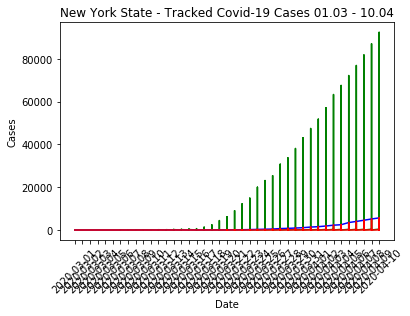

In [49]:
#NY versus NYC (out of interest)
plt.plot(df_ny.index, df_ny.cases, color='g')
plt.plot(df_nyc.index, df_nyc.deaths, color='b')
plt.plot(df_ny.index, df_ny.deaths, color='r')

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('New York State - Tracked Covid-19 Cases 01.03 - 10.04')
plt.xticks(rotation=45)
plt.show()

In [50]:
## italy starting 20-02-24
df_ita.head(15)
df_ita.groupby('denominazione_regione').sum().head()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
denominazione_regione,,,,,,,,,,,,,,
Abruzzo,715,2329.317208,736.914103,9975,2016,11991,28144,40135,1971,2487,3582,4240,47957,397799
Basilicata,935,2235.170879,869.283159,1235,441,1676,4771,6447,262,339,382,311,7140,85375
Calabria,990,2139.828679,912.692107,4450,533,4983,14053,19036,832,1011,1102,1286,21424,371647
Campania,825,2246.176105,783.796741,15914,3317,19231,48904,68135,3045,3988,6150,5090,79375,678562
Emilia-Romagna,440,2447.190175,623.794644,118314,11943,130257,240002,370259,13566,22184,70358,59213,499830,2180756


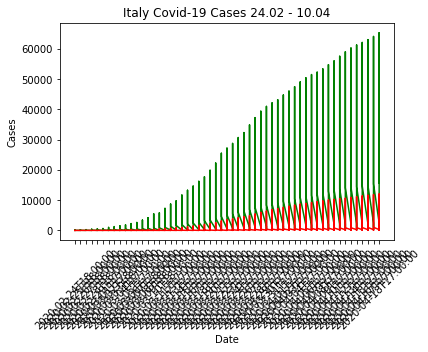

In [51]:
plt.plot(df_ita.index, df_ita.totale_casi, color='g')
plt.plot(df_ita.index, df_ita.deceduti, color='r')

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Italy Covid-19 Cases 24.02 - 10.04')
plt.xticks(rotation=45)
plt.show()